In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
plt.rcParams["figure.figsize"] = (20, 6)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('./fifaindex_players.csv')
pd.set_option('display.max_columns', None)
df.head()

,name,overall,potential,nationality,description,height,weight,preferred_foot,birth_date,age,preferred_positions,work_rate,weak_foot,skill_moves,value,wage,team_club,team_nation,ball_control,dribbling,marking,side_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shot,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,specialities_traits
0,Kylian Mbappé,91,95,France,"Kylian Mbappé was born on Dec. 20, 1998. He is...",182 cm,73 kg,Right,"Dec. 20, 1998",24,ST/LW,High / Low,4,5,€153.500.000,€1.800,France,Paris SG,91,93,NaN,32,34,64,93,92,38,83,88,78,85,71,97,87,76,81,97,93,77,72,88,93,82,80,69,84,83,11,13,5,7,6,Speedster/Dribbler/Acrobat/Clinical Finisher/C...
1,Kevin De Bruyne,91,91,Belgium,"Kevin De Bruyne was born on June 28, 1991. He ...",181 cm,75 kg,Right,"June 28, 1991",31,CM/CAM,High / Medium,5,4,€107.500.000,€1.800,Belgium,Manchester City,90,86,NaN,53,66,75,91,88,65,94,88,94,93,93,75,89,74,78,73,76,63,55,92,85,91,89,83,83,83,10,15,13,5,13,Dribbler/Playmaker/Distance Shooter/Crosser/Co...
2,Robert Lewandowski,91,91,Poland,"Robert Lewandowski was born on Aug. 21, 1988. ...",185 cm,81 kg,Right,"Aug. 21, 1988",34,ST,High / Medium,4,4,€84.000.000,€2.000,Poland,FC Barcelona,89,85,NaN,19,42,81,93,94,49,81,88,71,84,70,76,76,87,82,75,77,85,91,91,94,84,79,85,90,89,8,15,6,12,10,Aerial Threat/Distance Shooter/Clinical Finish...
3,Karim Benzema,91,91,France,"Karim Benzema was born on Dec. 19, 1987. He is...",185 cm,81 kg,Right,"Dec. 19, 1987",35,CF/ST,Medium / Medium,4,4,€64.000.000,€2.000,Real Madrid,0,91,87,NaN,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,Poacher/Clinical Finisher/Leadership/Finesse S...
4,Lionel Messi,91,91,Argentina,"Lionel Messi was born on June 24, 1987. He is ...",169 cm,67 kg,Left,"June 24, 1987",35,RW,Low / Low,4,4,€54.000.000,€1.500,Argentina,Paris SG,93,95,NaN,24,35,44,92,93,40,94,96,84,91,90,87,70,68,95,76,91,68,70,86,90,91,93,93,75,88,14,6,11,15,8,Dribbler/Distance Shooter/FK Specialist/Acroba...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 18000 non-null  object 
 1   overall              18000 non-null  int64  
 2   potential            18000 non-null  int64  
 3   nationality          18000 non-null  object 
 4   description          18000 non-null  object 
 5   height               18000 non-null  object 
 6   weight               18000 non-null  object 
 7   preferred_foot       18000 non-null  object 
 8   birth_date           18000 non-null  object 
 9   age                  18000 non-null  int64  
 10  preferred_positions  18000 non-null  object 
 11  work_rate            18000 non-null  object 
 12  weak_foot            18000 non-null  int64  
 13  skill_moves          18000 non-null  int64  
 14  value                17921 non-null  object 
 15  wage                 17921 non-null 

In [4]:
df.isnull().sum()

name                       0
overall                    0
potential                  0
nationality                0
description                0
height                     0
weight                     0
preferred_foot             0
birth_date                 0
age                        0
preferred_positions        0
work_rate                  0
weak_foot                  0
skill_moves                0
value                     79
wage                      79
team_club                  0
team_nation                0
ball_control               0
dribbling                  0
marking                18000
side_tackle                0
stand_tackle               0
aggression                 0
reactions                  0
att_position               0
interceptions              0
vision                     0
composure                  0
crossing                   0
short_pass                 0
long_pass                  0
acceleration               0
stamina                    0
strength      

### Removing the Marking column as it only has null values

In [5]:
df.drop(columns=['marking'], inplace=True)

In [6]:
df.shape

(18000, 52)

In [7]:
df.birth_date = pd.to_datetime(df.birth_date, infer_datetime_format=True)

In [8]:
df.head()

,name,overall,potential,nationality,description,height,weight,preferred_foot,birth_date,age,preferred_positions,work_rate,weak_foot,skill_moves,value,wage,team_club,team_nation,ball_control,dribbling,side_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shot,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,specialities_traits
0,Kylian Mbappé,91,95,France,"Kylian Mbappé was born on Dec. 20, 1998. He is...",182 cm,73 kg,Right,1998-12-20,24,ST/LW,High / Low,4,5,€153.500.000,€1.800,France,Paris SG,91,93,32,34,64,93,92,38,83,88,78,85,71,97,87,76,81,97,93,77,72,88,93,82,80,69,84,83,11,13,5,7,6,Speedster/Dribbler/Acrobat/Clinical Finisher/C...
1,Kevin De Bruyne,91,91,Belgium,"Kevin De Bruyne was born on June 28, 1991. He ...",181 cm,75 kg,Right,1991-06-28,31,CM/CAM,High / Medium,5,4,€107.500.000,€1.800,Belgium,Manchester City,90,86,53,66,75,91,88,65,94,88,94,93,93,75,89,74,78,73,76,63,55,92,85,91,89,83,83,83,10,15,13,5,13,Dribbler/Playmaker/Distance Shooter/Crosser/Co...
2,Robert Lewandowski,91,91,Poland,"Robert Lewandowski was born on Aug. 21, 1988. ...",185 cm,81 kg,Right,1988-08-21,34,ST,High / Medium,4,4,€84.000.000,€2.000,Poland,FC Barcelona,89,85,19,42,81,93,94,49,81,88,71,84,70,76,76,87,82,75,77,85,91,91,94,84,79,85,90,89,8,15,6,12,10,Aerial Threat/Distance Shooter/Clinical Finish...
3,Karim Benzema,91,91,France,"Karim Benzema was born on Dec. 19, 1987. He is...",185 cm,81 kg,Right,1987-12-19,35,CF/ST,Medium / Medium,4,4,€64.000.000,€2.000,Real Madrid,0,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,Poacher/Clinical Finisher/Leadership/Finesse S...
4,Lionel Messi,91,91,Argentina,"Lionel Messi was born on June 24, 1987. He is ...",169 cm,67 kg,Left,1987-06-24,35,RW,Low / Low,4,4,€54.000.000,€1.500,Argentina,Paris SG,93,95,24,35,44,92,93,40,94,96,84,91,90,87,70,68,95,76,91,68,70,86,90,91,93,93,75,88,14,6,11,15,8,Dribbler/Distance Shooter/FK Specialist/Acroba...


### Converting the Specialities and traits column values into individual lists

In [9]:
a = []
for i in df.specialities_traits:
    a.append(i.split('/'))

In [10]:
df.specialities_traits = np.array(a)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25276\3559850007.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df.specialities_traits = np.array(a)


In [11]:
df.head()

,name,overall,potential,nationality,description,height,weight,preferred_foot,birth_date,age,preferred_positions,work_rate,weak_foot,skill_moves,value,wage,team_club,team_nation,ball_control,dribbling,side_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shot,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,specialities_traits
0,Kylian Mbappé,91,95,France,"Kylian Mbappé was born on Dec. 20, 1998. He is...",182 cm,73 kg,Right,1998-12-20,24,ST/LW,High / Low,4,5,€153.500.000,€1.800,France,Paris SG,91,93,32,34,64,93,92,38,83,88,78,85,71,97,87,76,81,97,93,77,72,88,93,82,80,69,84,83,11,13,5,7,6,"[Speedster, Dribbler, Acrobat, Clinical Finish..."
1,Kevin De Bruyne,91,91,Belgium,"Kevin De Bruyne was born on June 28, 1991. He ...",181 cm,75 kg,Right,1991-06-28,31,CM/CAM,High / Medium,5,4,€107.500.000,€1.800,Belgium,Manchester City,90,86,53,66,75,91,88,65,94,88,94,93,93,75,89,74,78,73,76,63,55,92,85,91,89,83,83,83,10,15,13,5,13,"[Dribbler, Playmaker, Distance Shooter, Crosse..."
2,Robert Lewandowski,91,91,Poland,"Robert Lewandowski was born on Aug. 21, 1988. ...",185 cm,81 kg,Right,1988-08-21,34,ST,High / Medium,4,4,€84.000.000,€2.000,Poland,FC Barcelona,89,85,19,42,81,93,94,49,81,88,71,84,70,76,76,87,82,75,77,85,91,91,94,84,79,85,90,89,8,15,6,12,10,"[Aerial Threat, Distance Shooter, Clinical Fin..."
3,Karim Benzema,91,91,France,"Karim Benzema was born on Dec. 19, 1987. He is...",185 cm,81 kg,Right,1987-12-19,35,CF/ST,Medium / Medium,4,4,€64.000.000,€2.000,Real Madrid,0,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,"[Poacher, Clinical Finisher, Leadership, Fines..."
4,Lionel Messi,91,91,Argentina,"Lionel Messi was born on June 24, 1987. He is ...",169 cm,67 kg,Left,1987-06-24,35,RW,Low / Low,4,4,€54.000.000,€1.500,Argentina,Paris SG,93,95,24,35,44,92,93,40,94,96,84,91,90,87,70,68,95,76,91,68,70,86,90,91,93,93,75,88,14,6,11,15,8,"[Dribbler, Distance Shooter, FK Specialist, Ac..."


### Converting the Preferred postions column values into individual lists

In [12]:
a = []
for i in df.preferred_positions:
    a.append(i.split('/'))
df.preferred_positions = np.array(a)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25276\933641746.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df.preferred_positions = np.array(a)


### Converting the Work rate column values into individual lists

In [13]:
a = []
for i in df.work_rate:
    a.append(i.split('/'))
df.work_rate = np.array(a)

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(17921, 52)

### Handling numerical columns that have redundant characters like euro symbol and converting them into integers

In [16]:
a = []
for i in df.wage:
    a.append(int(''.join(filter(str.isdigit, i))))
df.wage = np.array(a)

In [17]:
a = []
for i in df.value:
    a.append(int(''.join(filter(str.isdigit, i))))
df.value = np.array(a)

In [18]:
a = []
for i in df.height:
    a.append(int(''.join(filter(str.isdigit, i))))
df.height = np.array(a)

In [19]:
a = []
for i in df.weight:
    a.append(int(''.join(filter(str.isdigit, i))))
df.weight = np.array(a)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17921 entries, 0 to 17999
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 17921 non-null  object        
 1   overall              17921 non-null  int64         
 2   potential            17921 non-null  int64         
 3   nationality          17921 non-null  object        
 4   description          17921 non-null  object        
 5   height               17921 non-null  int32         
 6   weight               17921 non-null  int32         
 7   preferred_foot       17921 non-null  object        
 8   birth_date           17921 non-null  datetime64[ns]
 9   age                  17921 non-null  int64         
 10  preferred_positions  17921 non-null  object        
 11  work_rate            17921 non-null  object        
 12  weak_foot            17921 non-null  int64         
 13  skill_moves          17921 non-

In [21]:
df.head()

,name,overall,potential,nationality,description,height,weight,preferred_foot,birth_date,age,preferred_positions,work_rate,weak_foot,skill_moves,value,wage,team_club,team_nation,ball_control,dribbling,side_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shot,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,specialities_traits
0,Kylian Mbappé,91,95,France,"Kylian Mbappé was born on Dec. 20, 1998. He is...",182,73,Right,1998-12-20,24,"[ST, LW]",High,4,5,153500000,1800,France,Paris SG,91,93,32,34,64,93,92,38,83,88,78,85,71,97,87,76,81,97,93,77,72,88,93,82,80,69,84,83,11,13,5,7,6,"[Speedster, Dribbler, Acrobat, Clinical Finish..."
1,Kevin De Bruyne,91,91,Belgium,"Kevin De Bruyne was born on June 28, 1991. He ...",181,75,Right,1991-06-28,31,"[CM, CAM]",High,5,4,107500000,1800,Belgium,Manchester City,90,86,53,66,75,91,88,65,94,88,94,93,93,75,89,74,78,73,76,63,55,92,85,91,89,83,83,83,10,15,13,5,13,"[Dribbler, Playmaker, Distance Shooter, Crosse..."
2,Robert Lewandowski,91,91,Poland,"Robert Lewandowski was born on Aug. 21, 1988. ...",185,81,Right,1988-08-21,34,[ST],High,4,4,84000000,2000,Poland,FC Barcelona,89,85,19,42,81,93,94,49,81,88,71,84,70,76,76,87,82,75,77,85,91,91,94,84,79,85,90,89,8,15,6,12,10,"[Aerial Threat, Distance Shooter, Clinical Fin..."
3,Karim Benzema,91,91,France,"Karim Benzema was born on Dec. 19, 1987. He is...",185,81,Right,1987-12-19,35,"[CF, ST]",Medium,4,4,64000000,2000,Real Madrid,0,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,"[Poacher, Clinical Finisher, Leadership, Fines..."
4,Lionel Messi,91,91,Argentina,"Lionel Messi was born on June 24, 1987. He is ...",169,67,Left,1987-06-24,35,[RW],Low,4,4,54000000,1500,Argentina,Paris SG,93,95,24,35,44,92,93,40,94,96,84,91,90,87,70,68,95,76,91,68,70,86,90,91,93,93,75,88,14,6,11,15,8,"[Dribbler, Distance Shooter, FK Specialist, Ac..."


In [22]:
a = df['specialities_traits'].explode()
a[:] = a.factorize()[0]
df['specialities_traits'] = a.groupby(level=0).agg(list)

In [23]:
a = df['preferred_positions'].explode()
a[:] = a.factorize()[0]
df['preferred_positions'] = a.groupby(level=0).agg(list)

In [24]:
df.work_rate.unique()

array(['High ', 'Medium ', 'Low '], dtype=object)

### Mapping the ordinal values in Work Rate column

In [25]:
scale_mapper = {
    "Low ": 1,
    "Medium ": 2,
    "High ": 3
}
df['work_rate'].replace(scale_mapper, inplace=True)

In [26]:
dataset = df.copy(deep=True)

### Dropping columns that are not useful for clustering

In [27]:
df.drop(columns=['name', 'description', 'birth_date'], inplace=True)

In [28]:
df.head()

,overall,potential,nationality,height,weight,preferred_foot,age,preferred_positions,work_rate,weak_foot,skill_moves,value,wage,team_club,team_nation,ball_control,dribbling,side_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shot,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,specialities_traits
0,91,95,France,182,73,Right,24,"[0, 1]",3,4,5,153500000,1800,France,Paris SG,91,93,32,34,64,93,92,38,83,88,78,85,71,97,87,76,81,97,93,77,72,88,93,82,80,69,84,83,11,13,5,7,6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,91,91,Belgium,181,75,Right,31,"[2, 3]",3,5,4,107500000,1800,Belgium,Manchester City,90,86,53,66,75,91,88,65,94,88,94,93,93,75,89,74,78,73,76,63,55,92,85,91,89,83,83,83,10,15,13,5,13,"[1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 7]"
2,91,91,Poland,185,81,Right,34,[0],3,4,4,84000000,2000,Poland,FC Barcelona,89,85,19,42,81,93,94,49,81,88,71,84,70,76,76,87,82,75,77,85,91,91,94,84,79,85,90,89,8,15,6,12,10,"[20, 11, 3, 21, 7, 8, 22]"
3,91,91,France,185,81,Right,35,"[4, 0]",2,4,4,64000000,2000,Real Madrid,0,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,"[23, 3, 15, 21, 19, 7, 24]"
4,91,91,Argentina,169,67,Left,35,[5],1,4,4,54000000,1500,Argentina,Paris SG,93,95,24,35,44,92,93,40,94,96,84,91,90,87,70,68,95,76,91,68,70,86,90,91,93,93,75,88,14,6,11,15,8,"[1, 11, 25, 2, 3, 21, 18, 19, 7, 22, 9]"


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17921 entries, 0 to 17999
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   overall              17921 non-null  int64 
 1   potential            17921 non-null  int64 
 2   nationality          17921 non-null  object
 3   height               17921 non-null  int32 
 4   weight               17921 non-null  int32 
 5   preferred_foot       17921 non-null  object
 6   age                  17921 non-null  int64 
 7   preferred_positions  17921 non-null  object
 8   work_rate            17921 non-null  int64 
 9   weak_foot            17921 non-null  int64 
 10  skill_moves          17921 non-null  int64 
 11  value                17921 non-null  int32 
 12  wage                 17921 non-null  int32 
 13  team_club            17921 non-null  object
 14  team_nation          17921 non-null  object
 15  ball_control         17921 non-null  int64 
 16  drib

### Outlier Detection and handling them

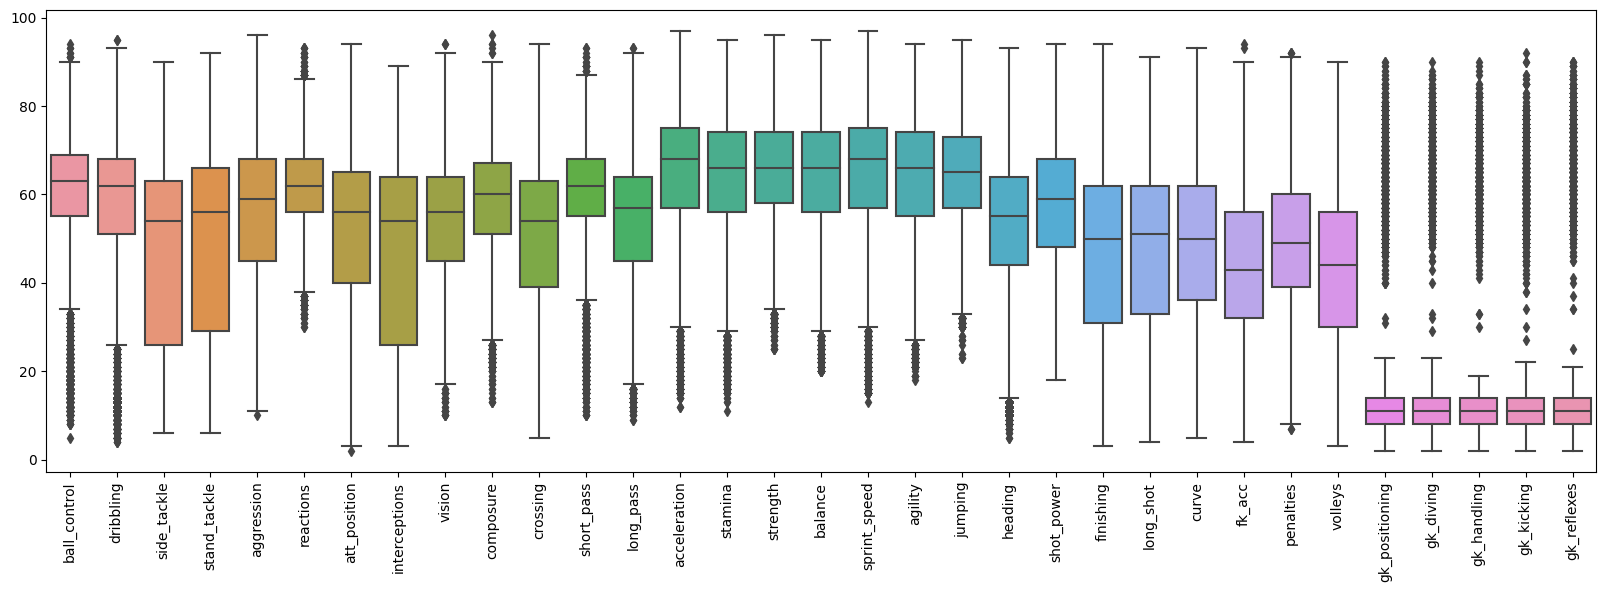

In [30]:
sns.boxplot(data=df[['ball_control', 'dribbling', 'side_tackle', 'stand_tackle', 'aggression', 'reactions', 'att_position', 'interceptions',	'vision', 'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading', 'shot_power',	'finishing', 'long_shot', 'curve', 'fk_acc', 'penalties', 'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes']])
plt.xticks(rotation=90)
plt.show()

In [31]:
df_copy = df[['ball_control', 'dribbling', 'side_tackle', 'stand_tackle', 'aggression', 'reactions', 'att_position', 'interceptions',	'vision', 'composure', 'crossing', 'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'jumping', 'heading', 'shot_power',	'finishing', 'long_shot', 'curve', 'fk_acc', 'penalties', 'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes']]
LW = df.quantile(0.01)
UW = df.quantile(0.99)

In [32]:
(((df_copy < LW) | (df_copy > UW))).value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_25276\657330519.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (((df_copy < LW) | (df_copy > UW))).value_counts()


acceleration  age    aggression  agility  att_position  balance  ball_control  composure  crossing  curve  dribbling  finishing  fk_acc  gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  heading  height  interceptions  jumping  long_pass  long_shot  overall  penalties  potential  reactions  short_pass  shot_power  side_tackle  skill_moves  sprint_speed  stamina  stand_tackle  strength  value  vision  volleys  wage   weak_foot  weight  work_rate
False         False  False       False    False         False    False         False      False     False  False      False      False   False      False        False       False           False        False    False   False          False    False      False      False    False      False      False      False       False       False        False        False         False    False         False     False  False   False    False  False      False   False        14364
                                                               

### Pandas Profiling

In [33]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [34]:
profile.to_file("fifa_profiling_report.html")

Summarize dataset:  39%|███▉      | 21/54 [00:01<00:01, 18.63it/s, Describe variable:acceleration]      


KeyboardInterrupt: 

In [35]:
df.value

0        153500000
1        107500000
2         84000000
3         64000000
4         54000000
           ...    
17995        40000
17996        50000
17997        35000
17998        50000
17999        50000
Name: value, Length: 17921, dtype: int32

<AxesSubplot: >

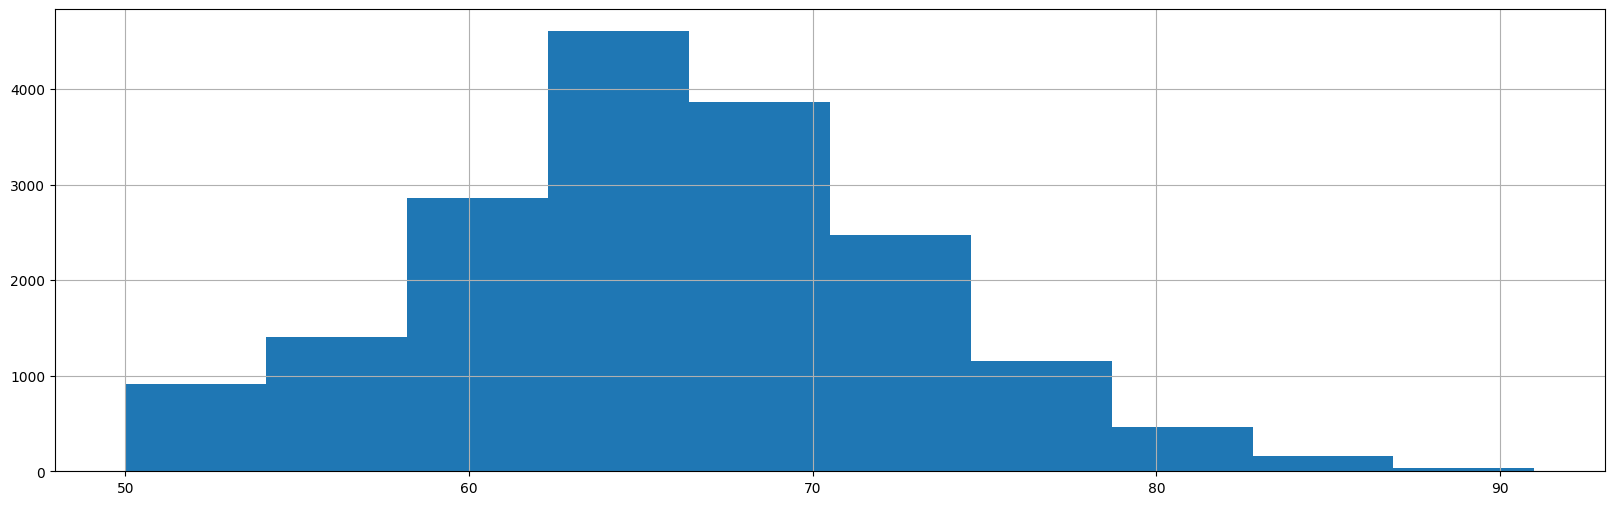

In [36]:
df.overall.hist()

In [37]:
df.head()

,overall,potential,nationality,height,weight,preferred_foot,age,preferred_positions,work_rate,weak_foot,skill_moves,value,wage,team_club,team_nation,ball_control,dribbling,side_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shot,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,specialities_traits
0,91,95,France,182,73,Right,24,"[0, 1]",3,4,5,153500000,1800,France,Paris SG,91,93,32,34,64,93,92,38,83,88,78,85,71,97,87,76,81,97,93,77,72,88,93,82,80,69,84,83,11,13,5,7,6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,91,91,Belgium,181,75,Right,31,"[2, 3]",3,5,4,107500000,1800,Belgium,Manchester City,90,86,53,66,75,91,88,65,94,88,94,93,93,75,89,74,78,73,76,63,55,92,85,91,89,83,83,83,10,15,13,5,13,"[1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 7]"
2,91,91,Poland,185,81,Right,34,[0],3,4,4,84000000,2000,Poland,FC Barcelona,89,85,19,42,81,93,94,49,81,88,71,84,70,76,76,87,82,75,77,85,91,91,94,84,79,85,90,89,8,15,6,12,10,"[20, 11, 3, 21, 7, 8, 22]"
3,91,91,France,185,81,Right,35,"[4, 0]",2,4,4,64000000,2000,Real Madrid,0,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,"[23, 3, 15, 21, 19, 7, 24]"
4,91,91,Argentina,169,67,Left,35,[5],1,4,4,54000000,1500,Argentina,Paris SG,93,95,24,35,44,92,93,40,94,96,84,91,90,87,70,68,95,76,91,68,70,86,90,91,93,93,75,88,14,6,11,15,8,"[1, 11, 25, 2, 3, 21, 18, 19, 7, 22, 9]"


### Mapping the values in Preferred Foot column

In [38]:
df.preferred_foot = df.preferred_foot.replace({'Right': 1, 'Left': 0})

<AxesSubplot: >

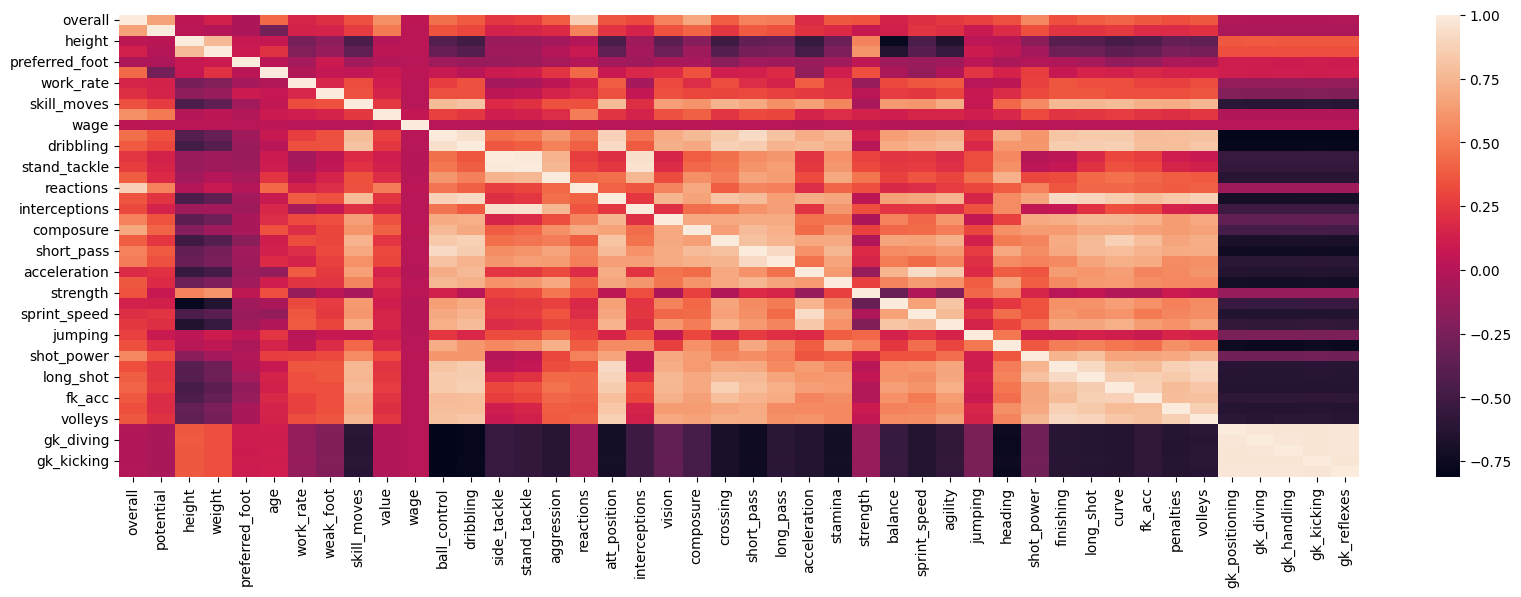

In [39]:
sns.heatmap(data=df.corr())

### More Feature Selection - Dropping gk_diving and gk_kicking columns as they have very less correlation

In [40]:
df.drop(columns=['gk_diving', 'gk_kicking'], inplace=True)

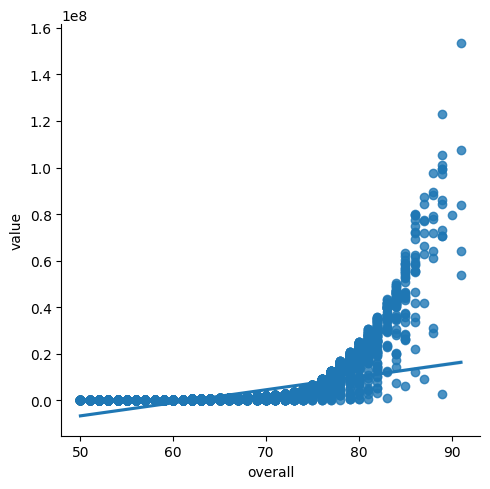

In [41]:
sns.lmplot(data= df, x= 'overall', y= 'value')
plt.show()

### Bar Chart shows player with higher stats are priced more

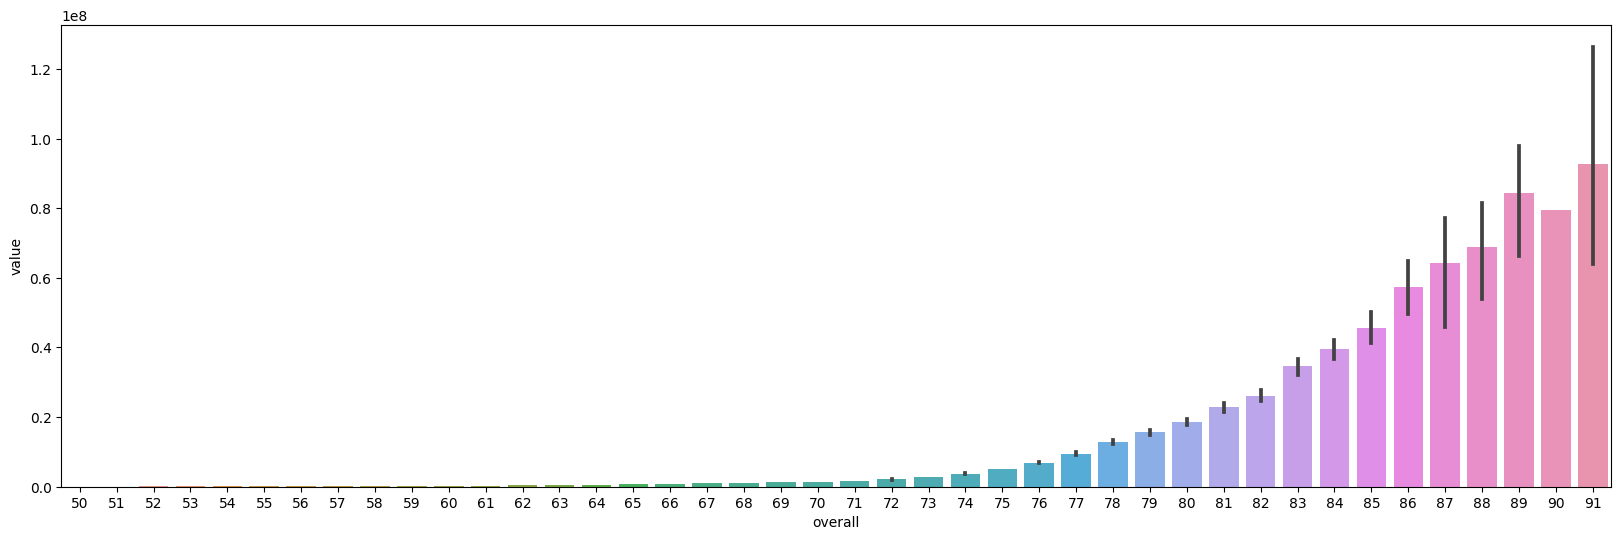

In [42]:
sns.barplot(data= df, x= 'overall', y= 'value')
plt.show()

In [43]:
df.head()

,overall,potential,nationality,height,weight,preferred_foot,age,preferred_positions,work_rate,weak_foot,skill_moves,value,wage,team_club,team_nation,ball_control,dribbling,side_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shot,curve,fk_acc,penalties,volleys,gk_positioning,gk_handling,gk_reflexes,specialities_traits
0,91,95,France,182,73,1,24,"[0, 1]",3,4,5,153500000,1800,France,Paris SG,91,93,32,34,64,93,92,38,83,88,78,85,71,97,87,76,81,97,93,77,72,88,93,82,80,69,84,83,11,5,6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,91,91,Belgium,181,75,1,31,"[2, 3]",3,5,4,107500000,1800,Belgium,Manchester City,90,86,53,66,75,91,88,65,94,88,94,93,93,75,89,74,78,73,76,63,55,92,85,91,89,83,83,83,10,13,13,"[1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 7]"
2,91,91,Poland,185,81,1,34,[0],3,4,4,84000000,2000,Poland,FC Barcelona,89,85,19,42,81,93,94,49,81,88,71,84,70,76,76,87,82,75,77,85,91,91,94,84,79,85,90,89,8,6,10,"[20, 11, 3, 21, 7, 8, 22]"
3,91,91,France,185,81,1,35,"[4, 0]",2,4,4,64000000,2000,Real Madrid,0,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,11,7,"[23, 3, 15, 21, 19, 7, 24]"
4,91,91,Argentina,169,67,0,35,[5],1,4,4,54000000,1500,Argentina,Paris SG,93,95,24,35,44,92,93,40,94,96,84,91,90,87,70,68,95,76,91,68,70,86,90,91,93,93,75,88,14,11,8,"[1, 11, 25, 2, 3, 21, 18, 19, 7, 22, 9]"


### Line plot showing players with higher overall stat have higher ball control skills

<AxesSubplot: xlabel='overall', ylabel='ball_control'>

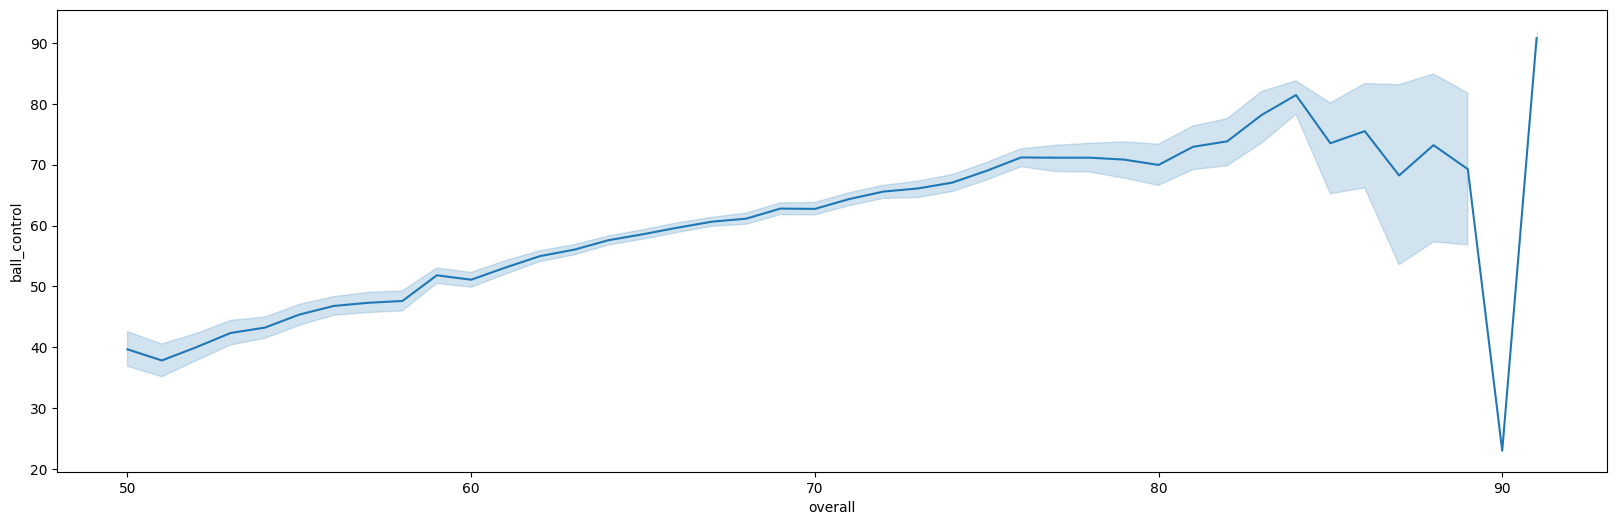

In [44]:
sns.lineplot(data=df, x = 'overall', y='ball_control')

### Plot showing younger player tend to score more penalties

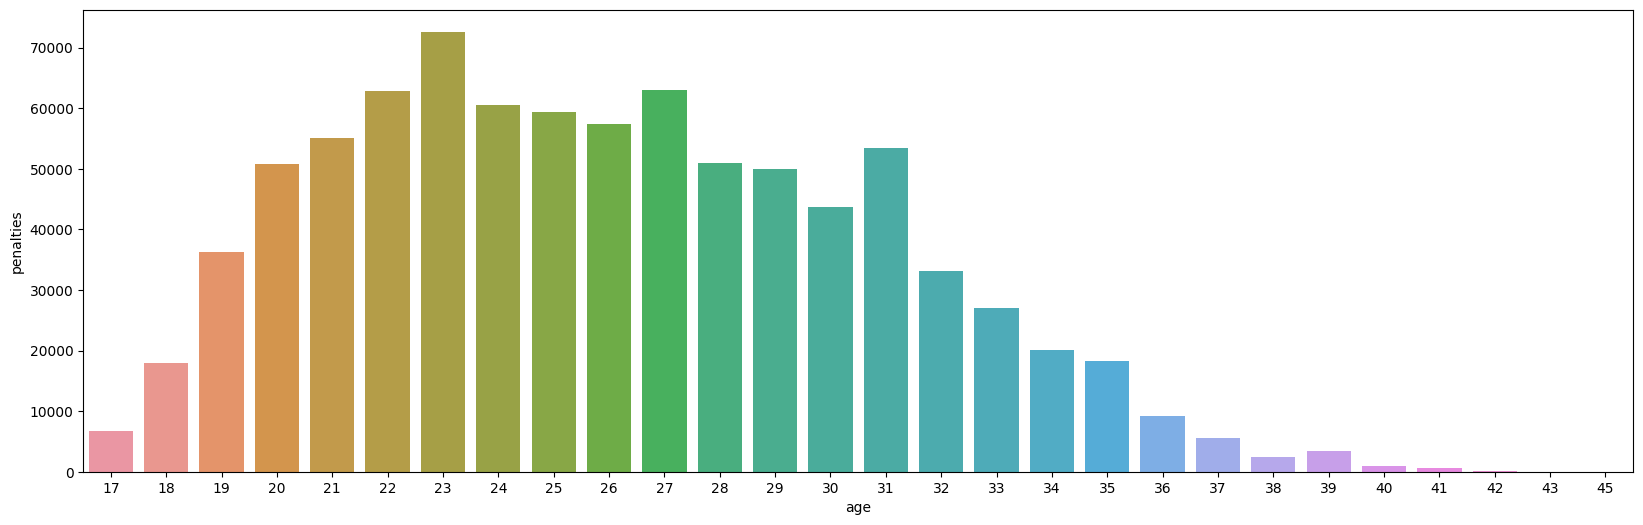

In [47]:
a = pd.DataFrame(dataset.groupby('age').penalties.sum())
a.reset_index(inplace=True)
a.columns = ['age', 'penalties']
sns.barplot(data=a, x= 'age', y= 'penalties')
plt.show()

### Plot showing older players have only slightly less stamina compared to younger players

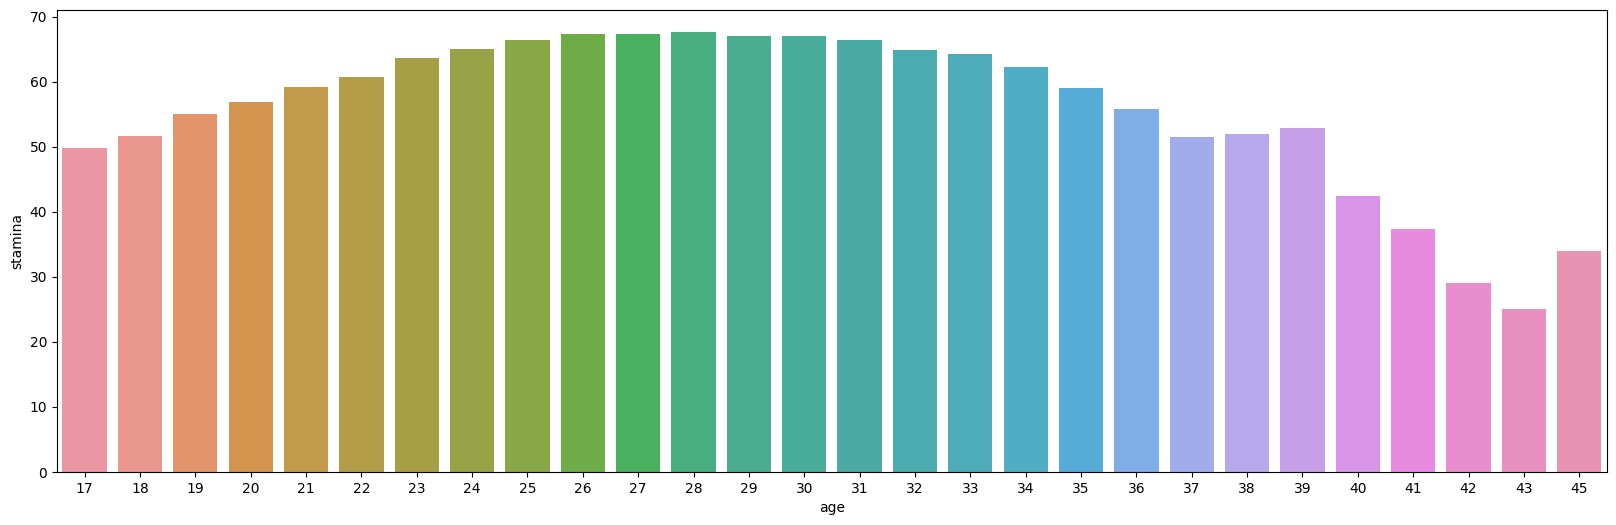

In [74]:
a = pd.DataFrame(dataset.groupby('age').stamina.mean())
a.reset_index(inplace=True)
a.columns = ['age', 'stamina']
sns.barplot(data=a, x= 'age', y= 'stamina')
plt.show()

In [49]:
cate_cols = df[['nationality', 'team_club', 'team_nation']]
df.drop(columns=['nationality', 'team_club', 'team_nation'], inplace=True)

In [50]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(cate_cols)

OneHotEncoder(handle_unknown='ignore')

In [51]:
cate_cols.shape

(17921, 3)

In [52]:
cat_encoded = enc.transform(cate_cols).toarray()

In [53]:
cat_encoded.shape

(17921, 1095)

In [54]:
df.shape

(17921, 44)

In [55]:
# df = pd.concat([df, pd.DataFrame(cat_encoded, columns=enc.get_feature_names_out(['nationality', 'team_club', 'team_nation']))], axis=1)
new_df = pd.DataFrame(cat_encoded, columns=enc.get_feature_names_out(['nationality', 'team_club', 'team_nation']))
new_df.head()

,nationality_Afghanistan,nationality_Albania,nationality_Algeria,nationality_Andorra,nationality_Angola,nationality_Antigua & Barbuda,nationality_Argentina,nationality_Armenia,nationality_Australia,nationality_Austria,nationality_Azerbaijan,nationality_Belarus,nationality_Belgium,nationality_Benin,nationality_Bermuda,nationality_Bolivia,nationality_Bosnia & Herzegovina,nationality_Brazil,nationality_Bulgaria,nationality_Burkina Faso,nationality_Burundi,nationality_Cameroon,nationality_Canada,nationality_Cape Verde,nationality_Central African Rep.,nationality_Chad,nationality_Chile,nationality_China PR,nationality_Chinese Taipei,nationality_Colombia,nationality_Comoros,nationality_Congo,nationality_Costa Rica,nationality_Croatia,nationality_Cuba,nationality_Curacao,nationality_Cyprus,nationality_Czech Republic,nationality_DR Congo,nationality_Denmark,nationality_Dominican Republic,nationality_Ecuador,nationality_Egypt,nationality_El Salvador,nationality_England,nationality_Equatorial Guinea,nationality_Estonia,nationality_Faroe Islands,nationality_Fiji,nationality_Finland,nationality_France,nationality_Gabon,nationality_Gambia,nationality_Georgia,nationality_Germany,nationality_Ghana,nationality_Gibraltar,nationality_Greece,nationality_Grenada,nationality_Guatemala,nationality_Guinea,nationality_Guinea Bissau,nationality_Guyana,nationality_Haiti,nationality_Honduras,nationality_Hong Kong,nationality_Hungary,nationality_Iceland,nationality_India,nationality_Indonesia,nationality_Iran,nationality_Iraq,nationality_Israel,nationality_Italy,nationality_Ivory Coast,nationality_Jamaica,nationality_Japan,nationality_Jordan,nationality_Kazakhstan,nationality_Kenya,nationality_Korea DPR,nationality_Korea Republic,nationality_Kosovo,nationality_Latvia,nationality_Lebanon,nationality_Liberia,nationality_Libya,nationality_Liechtenstein,nationality_Lithuania,nationality_Luxembourg,nationality_Madagascar,nationality_Mali,nationality_Malta,nationality_Mauritania,nationality_Mauritius,nationality_Mexico,nationality_Moldova,nationality_Montenegro,nationality_Montserrat,nationality_Morocco,nationality_Mozambique,nationality_Namibia,nationality_Netherlands,nationality_New Zealand,nationality_Nigeria,nationality_North Macedonia,nationality_Northern Ireland,nationality_Norway,nationality_Palestine,nationality_Panama,nationality_Paraguay,nationality_Peru,nationality_Philippines,nationality_Poland,nationality_Portugal,nationality_Puerto Rico,nationality_Qatar,nationality_Republic of Ireland,nationality_Romania,nationality_Russia,nationality_Saudi Arabia,nationality_Scotland,nationality_Senegal,nationality_Serbia,nationality_Seychelles,nationality_Sierra Leone,nationality_Slovakia,nationality_Slovenia,nationality_South Africa,nationality_South Sudan,nationality_Spain,nationality_St Kitts Nevis,nationality_St Lucia,nationality_Sudan,nationality_Suriname,nationality_Sweden,nationality_Switzerland,nationality_Syria,nationality_São Tomé & Príncipe,nationality_Tanzania,nationality_Thailand,nationality_Togo,nationality_Trinidad & Tobago,nationality_Tunisia,nationality_Turkey,nationality_Uganda,nationality_Ukraine,nationality_United Arab Emirates,nationality_United States,nationality_Uruguay,nationality_Uzbekistan,nationality_Vanuatu,nationality_Venezuela,nationality_Vietnam,nationality_Wales,nationality_Zambia,nationality_Zimbabwe,team_club_1. FC Köln,team_club_1. FC Magdeburg,team_club_1. FC Nürnberg,team_club_1. FSV Mainz 05,team_club_1860 München,team_club_9 de Octubre FC,team_club_AC Ajaccio,team_club_AC Horsens,team_club_AEK Athens,team_club_AFC Bournemouth,team_club_AFC Chindia,team_club_AFC Wimbledon,team_club_AGF,team_club_AIK,team_club_AJ Auxerre,team_club_AS Monaco,team_club_AS Saint-Étienne,team_club_ATK Mohun Bagan,team_club_AZ,team_club_AaB,team_club_Aalesunds FK,team_club_Aberdeen,team_club_Abha Club,team_club_Accrington,team_club_Adana Demirspor,team_club_Adelaide United,team_club_Ajax,team_club_Al Adalah,team_club_Al Ain FC,team_club_Al Batin

In [56]:
new_columns=list(df.columns) + list(new_df.columns)
new_columns

['overall',
 'potential',
 'height',
 'weight',
 'preferred_foot',
 'age',
 'preferred_positions',
 'work_rate',
 'weak_foot',
 'skill_moves',
 'value',
 'wage',
 'ball_control',
 'dribbling',
 'side_tackle',
 'stand_tackle',
 'aggression',
 'reactions',
 'att_position',
 'interceptions',
 'vision',
 'composure',
 'crossing',
 'short_pass',
 'long_pass',
 'acceleration',
 'stamina',
 'strength',
 'balance',
 'sprint_speed',
 'agility',
 'jumping',
 'heading',
 'shot_power',
 'finishing',
 'long_shot',
 'curve',
 'fk_acc',
 'penalties',
 'volleys',
 'gk_positioning',
 'gk_handling',
 'gk_reflexes',
 'specialities_traits',
 'nationality_Afghanistan',
 'nationality_Albania',
 'nationality_Algeria',
 'nationality_Andorra',
 'nationality_Angola',
 'nationality_Antigua & Barbuda',
 'nationality_Argentina',
 'nationality_Armenia',
 'nationality_Australia',
 'nationality_Austria',
 'nationality_Azerbaijan',
 'nationality_Belarus',
 'nationality_Belgium',
 'nationality_Benin',
 'nationality_Ber

In [57]:
df = pd.DataFrame(np.hstack([df,new_df]), columns=new_columns)

In [58]:
df.drop(columns=['preferred_positions', 'specialities_traits'], inplace=True)

In [59]:
df.shape

(17921, 1137)

In [60]:
df.fillna(0, inplace=True)

In [61]:
from sklearn.cluster import KMeans

### Elbow Method to calculate the optimal number of clusters

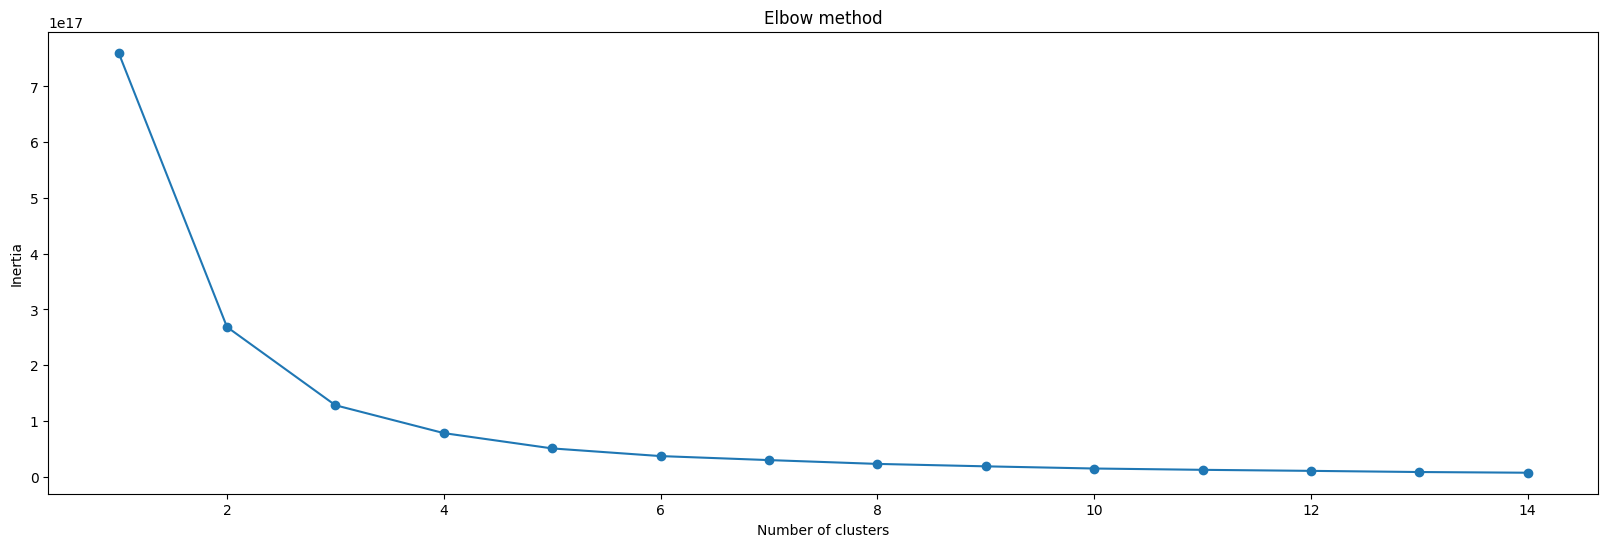

In [62]:
inertias = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,15), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [63]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [64]:
len(kmeans.labels_)

17921

In [65]:
dataset['label'] = kmeans.labels_

In [66]:
dataset.head()

,name,overall,potential,nationality,description,height,weight,preferred_foot,birth_date,age,preferred_positions,work_rate,weak_foot,skill_moves,value,wage,team_club,team_nation,ball_control,dribbling,side_tackle,stand_tackle,aggression,reactions,att_position,interceptions,vision,composure,crossing,short_pass,long_pass,acceleration,stamina,strength,balance,sprint_speed,agility,jumping,heading,shot_power,finishing,long_shot,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,specialities_traits,label
0,Kylian Mbappé,91,95,France,"Kylian Mbappé was born on Dec. 20, 1998. He is...",182,73,Right,1998-12-20,24,"[0, 1]",3,4,5,153500000,1800,France,Paris SG,91,93,32,34,64,93,92,38,83,88,78,85,71,97,87,76,81,97,93,77,72,88,93,82,80,69,84,83,11,13,5,7,6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]",2
1,Kevin De Bruyne,91,91,Belgium,"Kevin De Bruyne was born on June 28, 1991. He ...",181,75,Right,1991-06-28,31,"[2, 3]",3,5,4,107500000,1800,Belgium,Manchester City,90,86,53,66,75,91,88,65,94,88,94,93,93,75,89,74,78,73,76,63,55,92,85,91,89,83,83,83,10,15,13,5,13,"[1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 7]",2
2,Robert Lewandowski,91,91,Poland,"Robert Lewandowski was born on Aug. 21, 1988. ...",185,81,Right,1988-08-21,34,[0],3,4,4,84000000,2000,Poland,FC Barcelona,89,85,19,42,81,93,94,49,81,88,71,84,70,76,76,87,82,75,77,85,91,91,94,84,79,85,90,89,8,15,6,12,10,"[20, 11, 3, 21, 7, 8, 22]",2
3,Karim Benzema,91,91,France,"Karim Benzema was born on Dec. 19, 1987. He is...",185,81,Right,1987-12-19,35,"[4, 0]",2,4,4,64000000,2000,Real Madrid,0,91,87,18,24,63,92,92,39,89,90,75,89,76,79,82,82,72,80,78,79,90,87,92,80,82,73,84,88,5,13,11,5,7,"[23, 3, 15, 21, 19, 7, 24]",2
4,Lionel Messi,91,91,Argentina,"Lionel Messi was born on June 24, 1987. He is ...",169,67,Left,1987-06-24,35,[5],1,4,4,54000000,1500,Argentina,Paris SG,93,95,24,35,44,92,93,40,94,96,84,91,90,87,70,68,95,76,91,68,70,86,90,91,93,93,75,88,14,6,11,15,8,"[1, 11, 25, 2, 3, 21, 18, 19, 7, 22, 9]",1


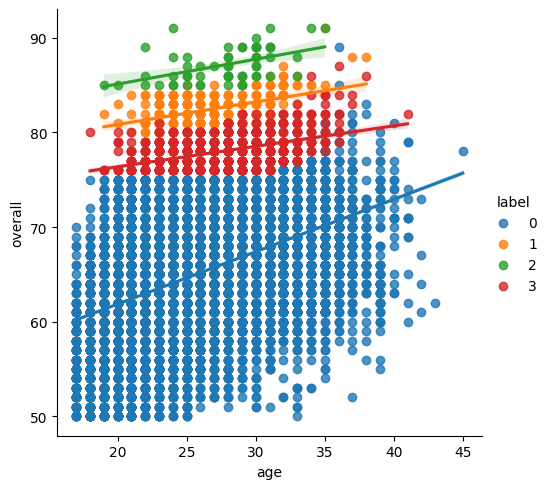

In [68]:
sns.lmplot(data=dataset, x='age', y='overall', hue='label')
plt.show()

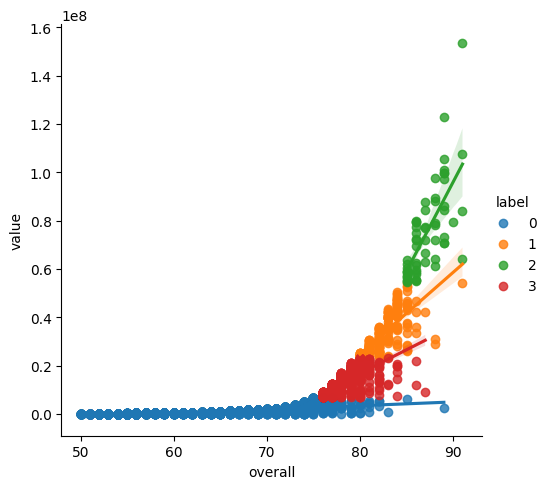

In [71]:
sns.lmplot(data=dataset, x='overall', y='value', hue='label')
plt.show()